In [1]:
#Author: YU Wenshan
#Date: 2024-3-16

Approximation of Dirac delta function $\delta(x)$ which satisfies:


$\delta(0) = +\infty$, $\delta(x) = 0$ for any $ x \neq 0$ and $\int_{\mathbb{R}}\delta(x) dx = 1$

To approximate the above distribution, we construct the so-called delta-like approximation:
$\phi_{\epsilon} = \pi^{-n/2}\epsilon^{-n} \exp({-(\frac{x}{\epsilon})^2})$ via the famous Gaussian Kernel $\exp({-x^2})$.

We have $\phi_{\epsilon} \rightarrow \delta(x)$ when $\epsilon \rightarrow 0$.

Proof:
For any test function $\psi(x) \in C_c^{\infty}(\mathbb{R^n})$, by changing of variables: $x = \epsilon y$, we have
$$
\pi^{-n/2} \int_{\mathbb{R^n}} \epsilon^{-n} \exp({-(\frac{x}{\epsilon})^2})\psi(x)dx = \pi^{-n/2} \int_{\mathbb{R^n}}  \exp({-y^2})\psi(\epsilon y)dy
$$
then let $\epsilon \rightarrow 0$, 
$$
 \pi^{-n/2}\int_{\mathbb{R^n}}  \exp({-y^2})\psi(0 )dy 
 = \pi^{-n/2}\int_{\mathbb{R^n}} \exp({-y^2})dy\psi(0) 
 = \psi(0) =: \langle \delta, \psi \rangle
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz,quad    # quad: built-in 
from scipy.integrate import fixed_quad    # Gaussion quadrature rule 

In [3]:
def Gaussion_Kernel(x):
    return np.exp(-abs(x)**2)

def Dirac_delta_approximation(x,epsilon,dim,mass):
    if dim == 1:
        return 1/mass*epsilon**-1*Gaussion_Kernel(x/epsilon)
    else:
        print("error!")

In [13]:
x = np.linspace(-200, 200, 200000)
#print(x)
I_trapz = trapz(Gaussion_Kernel(x),x)    # trapzoidal rules;
print(I_trapz)

1.772453850905516


/var/folders/34/y8hf69sn049cs70dp88nv1h00000gn/T/ipykernel_21233/404961842.py:3: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  I_trapz = trapz(Gaussion_Kernel(x),x)    # trapzoidal rules;


In [5]:
I_quad = quad(lambda x: Gaussion_Kernel(x), -np.inf, +np.inf)[0]
I_quad

1.7724538509055159

In [6]:
I = quad(lambda x: np.sin(x),-np.inf,+np.inf)    # quad:the best performance in scipy.integrate for any function;
print(I)

(0.0, 0.0)


In [16]:
f = lambda x: np.exp(-abs(x)**2)
I_gauss_quad = fixed_quad(f, -200, +200, n= 1000)
I_gauss_quad


(1.7724538508571717, None)

In [12]:
gauss_integral_exact = np.sqrt(np.pi)
print(gauss_integral_exact)

1.7724538509055159


/var/folders/34/y8hf69sn049cs70dp88nv1h00000gn/T/ipykernel_21233/1576564390.py:7: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  Integrate_delta_like = trapz(y[k,:],x)


epsilon =: 5 ;mass_delta-like: 1.0
epsilon =: 10 ;mass_delta-like: 1.0
epsilon =: 20 ;mass_delta-like: 0.9999999999999998


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

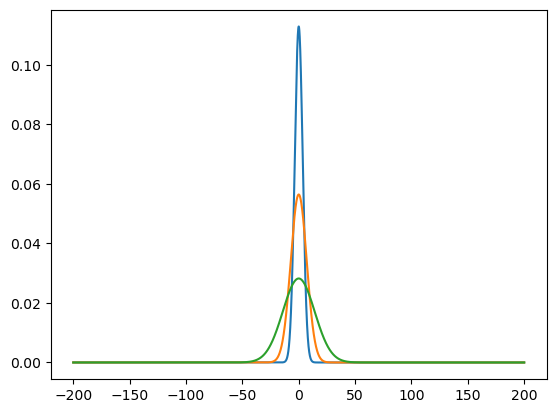

In [10]:
y = np.zeros((3,200000))
for k in range(0,3):
    epsilon = 5*2**k
    I_quad = quad(lambda x: Gaussion_Kernel(x), -200, +200)[0]
    for i in range(0,200000):
        y[k,i] = Dirac_delta_approximation(x[i],epsilon=epsilon,dim=1, mass =  I_quad)
    Integrate_delta_like = trapz(y[k,:],x)
    print ( "epsilon =:", epsilon,";mass_delta-like:",Integrate_delta_like)
    plt.figure()
    #plt.gca().hold(True)
    #plt.plot(x,y[k,:])
plt.plot(x,y[0,:])
plt.plot(x,y[1,:])
plt.plot(x,y[2,:])